In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans






In [2]:
# Import dataset
df = pd.read_csv('Mall_Customers.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [5]:
X = df.drop(['CustomerID','Gender'], axis=1)
X

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


C:\Users\irfan.fadhil\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irfan.fadhil\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\irfan.fadhil\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irfan.fadhil\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster

Text(4, 50000, 'Possible elbow point')

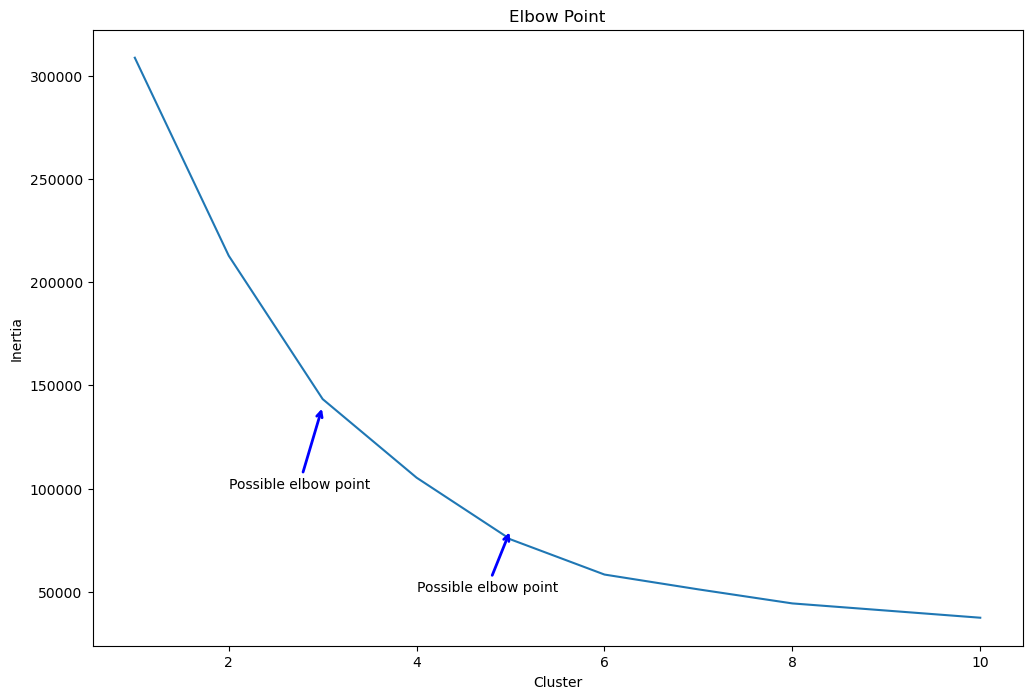

In [6]:
# Determine the optimal number of cluster
# Elbow method

cluster = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    cluster.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title('Elbow Point')
ax.set_xlabel('Cluster')
ax.set_ylabel('Inertia')

# Elbow arrow
ax.annotate('Possible elbow point', xy=(3,140000), xytext=(2,100000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Possible elbow point', xy=(5,80000), xytext=(4,50000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

In [7]:
# K-Means clustering
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Label'] = kmean.labels_

C:\Users\irfan.fadhil\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irfan.fadhil\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

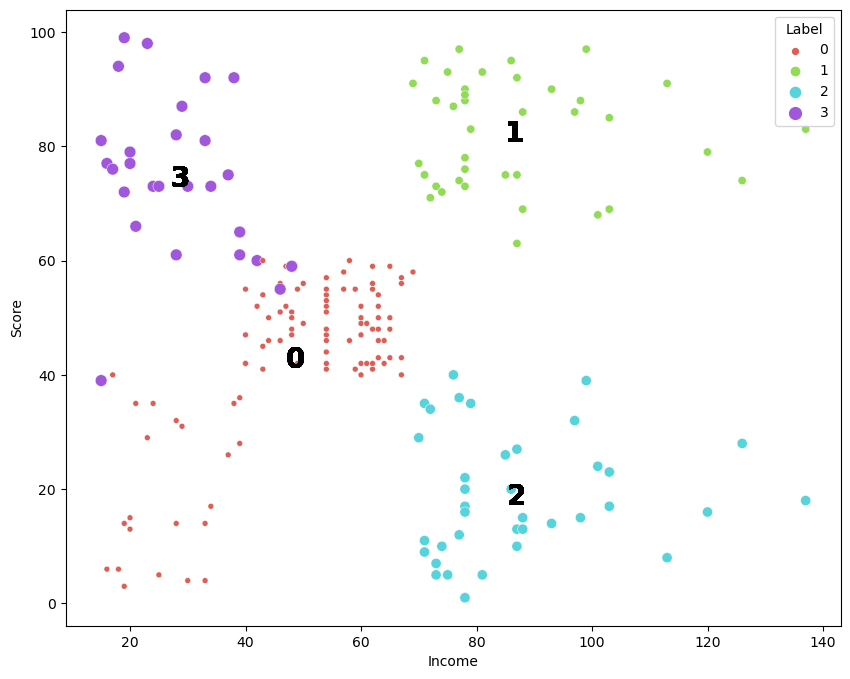

In [8]:
# Plot result
plt.figure(figsize=(10,8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Label'], markers=True, size=X['Label'], palette=sns.color_palette('hls', n_clust))

for label in X['Label']:
    plt.annotate(label,
                 (X[X['Label']==label]['Income'].mean(),
                  X[X['Label']==label]['Score'].mean()),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  size = 20, weight='bold',
                  color= 'black')

In [9]:
X.to_excel('output_cluster.xlsx', index=False)